<a href="https://colab.research.google.com/github/aritraghsh09/GaMPEN/blob/master/tutorials/Training_and_Inference_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training GaMPEN

In this Jupyter Notebook, we will demonstrate how you can train a GaMPEN model from scratch and perform inference with it on galaxy images. For an extensive documentation on GaMPEN, please refer to https://gampen.readthedocs.io/en/latest/index.html

This tutorial has been developed by [Aritra Ghosh](http://ghosharitra.com) and [Aayush Mishra](https://github.com/aayush2505).

## Preliminary stuff

### Connect to GPU runtime

Before we dive in, note that Google Colab gives you the ability to use GPUs for this tutorial.  

To do this, on the Google Colab menu bar select "Runtime" -> "Change runtime type" -> "Hardware accelerator" -> "GPU".

### Colab-Specific Steps

We want to make some changes to Colab's default environment. So, let's use miniconda to create our own custom environment.

Some of these commands are specifically for Google Colab. If doing this on your own machine, please follow the steps outlined [here](https://gampen.readthedocs.io/en/latest/Getting_Started.html)

In [ ]:
!pip install virtualenv
!virtualenv myenv
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_23.1.0-1-Linux-x86_64.sh
!chmod +x Miniconda3-py37_23.1.0-1-Linux-x86_64.sh
!./Miniconda3-py37_23.1.0-1-Linux-x86_64.sh -b -f -p /usr/local

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 23.9 MB/s eta 0:00:00
created virtual environment CPython3.10.12.final.0-64 in 1219ms
  creator CPython3Posix(dest=/content/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.0, setuptools==69.5.1, wheel==0.43.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator
--2024-05-16 03:20:08--  https://repo.anaconda.com/miniconda/Miniconda3-py37_23.1.0-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90665082 (86M)

In [ ]:
!conda install -q -y --prefix /usr/local python=3.7 ujson

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - python=3.7
    - ujson


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.3.11  |       h06a4308_0         127 KB
    openssl-1.1.1w             |       h7f8727e_0         3.7 MB
    ujson-5.4.0                |   py37h6a678d5_0          44 KB
    ------------------------------------------------------------
                                           Total:         3.9 MB

The following NEW packages will be INSTALLED:

  ujson              pkgs/main/linux-64::ujson-5.4.0-py37h6a678d5_0 

The following packages will be UPDATED:

  ca-certificates                     2023.01.10-h06a4308_0 --> 2024.3.11-h06a4308_0 
  openssl                                 1.1.1s-h7f8727e_0 --> 1.1.1w-h7f8727e_0 


Preparing transaction: ...working... done
Verify

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
# activate conda enviornment
import os
os.environ['CONDA_PREFIX'] = '/usr/local/envs/myenv'

In [ ]:
!python --version

Python 3.7.16


In [ ]:
!pip install h5py
!pip install typing-extensions
!pip install wheel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 79.8 MB/s eta 0:00:00


### Installing GaMPEN

First, let's install GaMPEN.

Some of these commands are specifically for Google Colab. If doing this on your own machine, please follow the steps outlined [here](https://gampen.readthedocs.io/en/latest/Getting_Started.html)

**WARNING ⚠: If this cell triggers a "Restrat Session" suggestion from Colab, remember to re-run this cell after restarting the session.**

In [ ]:
!git clone https://github.com/aritraghsh09/GaMPEN.git

Cloning into 'GaMPEN'...
remote: Enumerating objects: 2247, done.
remote: Counting objects: 100% (595/595), done.
remote: Compressing objects: 100% (272/272), done.
remote: Total 2247 (delta 370), reused 529 (delta 318), pack-reused 1652
Receiving objects: 100% (2247/2247), 24.29 MiB | 19.37 MiB/s, done.
Resolving deltas: 100% (1458/1458), done.


In [ ]:
%cd /content/GaMPEN/

!pip install -r requirements.txt

/content/GaMPEN
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/GaMPEN (from -r requirements.txt (line 2))
  Cloning https://github.com/adambielski/GrouPy (to revision e9c2e5ae8f2234359a9f68b52d9d430d9a72f4d7) to /tmp/pip-install-yf8d5_m5/groupy_09824d7a9d0d40e588587805f1ca2ec8
  Running command git clone -q https://github.com/adambielski/GrouPy /tmp/pip-install-yf8d5_m5/groupy_09824d7a9d0d40e588587805f1ca2ec8
  Running command git rev-parse -q --verify 'sha^e9c2e5ae8f2234359a9f68b52d9d430d9a72f4d7'
  Running command git fetch -q https://github.com/adambielski/GrouPy e9c2e5ae8f2234359a9f68b52d9d430d9a72f4d7
     |████████████████████████████████| 1.1 MB 13.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.5 MB 67.0 MB/s 
     |████████████████████████████████| 121 kB 71.0 MB/s 
     |██

### Checking the Installation

In order to check whether the installation has occured succesfully, run the command below.  

In [ ]:
!make check

flake8 --ignore=E203,W503 ggt
pytest
============================= test session starts ==============================
platform linux -- Python 3.8.16, pytest-6.0.1, py-1.9.0, pluggy-0.13.1
rootdir: /content/GaMPEN
plugins: typeguard-2.7.1
collected 7 items                                                              

ggt/tests/test_install.py .                                              [ 14%]
ggt/tests/test_metrics.py .                                              [ 28%]
ggt/tests/test_models.py ...s                                            [ 85%]
ggt/tests/test_utils.py .                                                [100%]

======================== 6 passed, 1 skipped in 13.35s =========================


As long as the tests do not produce any errors, you are good to go!

Note that warnings and and tests being skipped are ok!

## Getting Images & Training Data

Tto train a GaMPEN model from scratch, we need both images as well as training labels.

*In* order for GaMPEN to detect training images and associated training labels, it requires a target data directory with a specific structure as outlined below.

```
- data_directory
  - info.csv
  - cutouts/
```
So, essentially you need a data-directory (which can be named whatever you want to) with a file named `info.csv` as well as a folder named `cutouts`. The cutouts folder should contain all images in your dataset and the `info.csv` file should contain at the very least:-

  * a unique identifier for each image
  * the filename for each image
  * target labels/variables for every image to be used for training.

In order for this tutorial, let's use some simulated Hyper Suprime-Cam images that can be downloaded from the Yale FTP servers. For this, we will use the pre-defined `make hsc_demo` command from root `GaMPEN` directory

In [ ]:
%cd /content/GaMPEN/
!make demodir=/content/hsc hsc_demo #the demodir variable controls where the demo. directory is created

/content/GaMPEN
mkdir -p /content/hsc/cutouts
curl ftp://ftp.astro.yale.edu/pub/hsc_morph/gampen_tutorial_files/for_train/info.csv > /content/hsc/info.csv
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5694  100  5694    0     0   3855      0  0:00:01  0:00:01 --:--:--  3852
wget -nH --cut-dirs 5 -r ftp://ftp.astro.yale.edu/pub/hsc_morph/gampen_tutorial_files/for_train/cutouts/ -P /content/hsc/cutouts/
--2022-12-17 19:46:35--  ftp://ftp.astro.yale.edu/pub/hsc_morph/gampen_tutorial_files/for_train/cutouts/
           => ‘/content/hsc/cutouts/.listing’
Resolving ftp.astro.yale.edu (ftp.astro.yale.edu)... 128.36.139.12
Connecting to ftp.astro.yale.edu (ftp.astro.yale.edu)|128.36.139.12|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/hsc_morph/gampen_tutorial_files/for_train/cutouts ... do

As the code block below shows we have now created a data-directory named `hsc/` with an `info.csv` file and a `cutouts/` folder within `hsc/` that contains all our images.

In [ ]:
!ls /content/hsc

cutouts  info.csv


In [ ]:
!ls /content/hsc/cutouts/

0.fits	     100011.fits  100023.fits  100035.fits  100047.fits  100059.fits
100000.fits  100012.fits  100024.fits  100036.fits  100048.fits  10005.fits
100001.fits  100013.fits  100025.fits  100037.fits  100049.fits  100060.fits
100002.fits  100014.fits  100026.fits  100038.fits  10004.fits	 10006.fits
100003.fits  100015.fits  100027.fits  100039.fits  100050.fits  1000.fits
100004.fits  100016.fits  100028.fits  10003.fits   100051.fits  100.fits
100005.fits  100017.fits  100029.fits  100040.fits  100052.fits  10.fits
100006.fits  100018.fits  10002.fits   100041.fits  100053.fits  1.fits
100007.fits  100019.fits  100030.fits  100042.fits  100054.fits
100008.fits  10001.fits   100031.fits  100043.fits  100055.fits
100009.fits  100020.fits  100032.fits  100044.fits  100056.fits
10000.fits   100021.fits  100033.fits  100045.fits  100057.fits
100010.fits  100022.fits  100034.fits  100046.fits  100058.fits


Now, let's also take a look at the info.csv file

In [ ]:
import pandas as pd

info = pd.read_csv('/content/hsc/info.csv')
info

,object_id,file_name,total_flux,bt,R_e,ln_total_flux_adus,custom_logit_bt,ln_R_e_asec
0,0,0.fits,67757.152,0.263,1.976718,11.123685,-1.030434,0.681438
1,1,1.fits,40757.690,0.396,1.777581,10.615400,-0.422160,0.575253
2,10,10.fits,71291.242,0.945,3.094357,11.174529,2.843852,1.129580
3,100,100.fits,108342.007,0.651,0.221669,11.593048,0.623438,-1.506569
4,1000,1000.fits,56213.959,0.986,1.761342,10.936920,4.254599,0.566076
...,...,...,...,...,...,...,...,...
62,100056,100056.fits,6718.534,0.878,2.888698,8.812625,1.973626,1.060806
63,100057,100057.fits,100731.938,0.606,2.250486,11.520218,0.430529,0.811146
64,100058,100058.fits,19488.832,0.530,2.596899,9.877597,0.120144,0.954318
65,100059,100059.fits,28236.658,0.663,1.486933,10.248376,0.676692,0.396716


As can be seen `info.csv` has information about all the 67 images in the cutouts folder. The `bt`,`R_e`,`total_flux` refer to the bulge-to-total light ratio, effective radius, and flux of the simulated images. We also have columns where we have transformed these columns to their logit or log transforms. For the purposes of this demo, we will use `custom_logit_bt`, `ln_R_e`, and `ln_total_flux` as the three variables we are trying to train the GaMPEN model to predict.

**⚠ NOTE:** The `ln_R_e` and `ln_total_flux` are simply the `log_e` transformations applied to the effective radius and flux. The `custom_logit_bt` is a logit transformation applied to the bulge-to-total light ratio. The only way this is different from the standard logit transformation is that we prevent function from blowing up for values close to zero or one. The custom function we use is mentioned below and also in the [GaMPEN Public Data Release Handbook](https://gampen.readthedocs.io/en/latest/Public_data.html#custom-scaling-function)

```python
from scipy.special import logit

def logit_custom(x_input):
    
    '''Handling for 0s and 1s while doing a
       logit transformation
       
       x_input should be the entire column/array
       in info.csv over which you are applying
       the transformation'''
    
    x = np.array(x_input)
    
    if np.min(x) < 0 or np.max(x) > 1:
        raise ValueError("x must be between 0 and 1")

    if np.min(x) == 0:
        min_x = np.min(x[x != 0])
        add_epsilon = min_x/2.0
        x[np.where(x==0)[0]] = add_epsilon
        
    if np.max(x) == 1:
        max_x = np.max(x[x != 1])
        sub_epsilon = (1-max_x)/2.0
        x[np.where(x==1)[0]] = 1.0 - sub_epsilon
        
    return logit(x)

```



**⚠ NOTE:** In order for GaMPEN to work correctly, you need to name the columns `object_id` and `file_name` exactly as it is done here. You can have as many additional/redundant columns in the `.csv` as you want to. But without these two, GaMPEN won't work properly.

Now, let's also take quick peek at some of the images

In [ ]:
!pip install matplotlib==3.1.3 --quiet

     |████████████████████████████████| 13.1 MB 15.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
fastai 2.7.10 requires torch<1.14,>=1.7, but you have torch 1.6.0 which is incompatible.
fastai 2.7.10 requires torchvision>=0.8.2, but you have torchvision 0.7.0 which is incompatible.


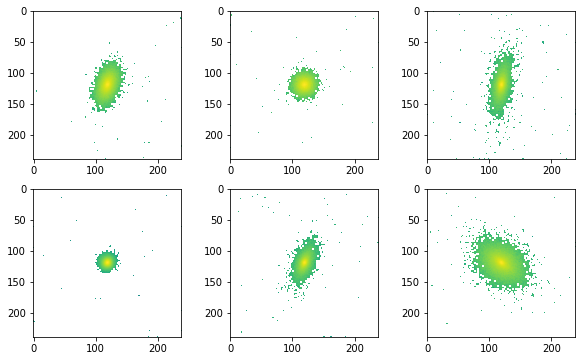

In [ ]:
import pylab as plt
import matplotlib as mpl
from astropy.io import fits
LOGMIN = 1e-4

#Low-z Data
fig, ax = plt.subplots(2,3,figsize=(10,6))
ax = ax.flatten()

for i,file_name in enumerate(info['file_name'][:6]):
  img_data = fits.getdata('/content/hsc/cutouts/' + file_name)

  ax[i].imshow(img_data,norm=mpl.colors.LogNorm(vmin=max(img_data.min(),LOGMIN)))

These images were simulated to match Hyper Suprime-Cam Wide data and each galaxy contains a simulated disk and bulge component along with real noise and PSF. Please refer to [Ghosh et. al. 2022](https://iopscience.iop.org/article/10.3847/1538-4357/ac7f9e) for more details about the simulated images.

## Training GaMPEN on the simulated images


Now, let's train a GaMPEN model from scratch on these images.

**⚠ NOTE: 67 images are clearly not enough to train GaMPEN. We are using this just for demonstration purposes, and don't expect good results!**



### Splitting the dataset

We first use the `make_splits` module of GaMPEN to split the dataset into training, testing and devel (validation) sets.

The two arguments for `make_splits` are:-
* `data_dir`: This should point to the data-directory with `info.csv`
* `target_matric`: `make_splits` splits the data-set into training/test/devel into unbalanced splits, which randomly picks images for each split. These are called `unbalanced` splits. It also creates some `balanced` splits, where it first splits the dataset into 4 partitions based on the `target_metric` variable; and then draws samples such that the samples used for trianing are balanced across these 4 partitions.

In [ ]:
!python /content/GaMPEN/ggt/data/make_splits.py --data_dir=/content/hsc/ --target_metric='bt'

The `make_splts` module will create a folder called `/splits/` within the data-directory where it stores the different splits of the `info.csv` file it has created. Let's inspect this folder



In [ ]:
!ls /content/hsc/splits/

balanced-dev2-devel.csv  balanced-sm-train.csv	    unbalanced-lg-test.csv
balanced-dev2-test.csv	 balanced-xl-devel.csv	    unbalanced-lg-train.csv
balanced-dev2-train.csv  balanced-xl-test.csv	    unbalanced-md-devel.csv
balanced-dev-devel.csv	 balanced-xl-train.csv	    unbalanced-md-test.csv
balanced-dev-test.csv	 balanced-xs-devel.csv	    unbalanced-md-train.csv
balanced-dev-train.csv	 balanced-xs-test.csv	    unbalanced-sm-devel.csv
balanced-lg-devel.csv	 balanced-xs-train.csv	    unbalanced-sm-test.csv
balanced-lg-test.csv	 unbalanced-dev2-devel.csv  unbalanced-sm-train.csv
balanced-lg-train.csv	 unbalanced-dev2-test.csv   unbalanced-xl-devel.csv
balanced-md-devel.csv	 unbalanced-dev2-train.csv  unbalanced-xl-test.csv
balanced-md-test.csv	 unbalanced-dev-devel.csv   unbalanced-xl-train.csv
balanced-md-train.csv	 unbalanced-dev-test.csv    unbalanced-xs-devel.csv
balanced-sm-devel.csv	 unbalanced-dev-train.csv   unbalanced-xs-test.csv
balanced-sm-test.csv	 unbalanced-lg-devel.csv  

As explained above, the `balanced` files refer to the files with balanced splits and the `unbalanced` files refer to the files with unbalanced splits.

As you can see there are also some labels (`dev2`,`dev`,`lg`,`md`,`sm`,`xl`,`xs`) assigned to the different files. These indicate a set of different kinds of splits where different fractions of data have been assigned to the train/test/devel splits:-

     * xs - train=0.027, devel=0.003, test=0.970
     * sm - train=0.045, devel=0.005, test=0.950
     * md - train=0.090, devel=0.010, test=0.900
     * lg - train=0.200, devel=0.050, test=0.750
     * xl - train=0.450, devel=0.050, test=0.500
     * dev - train=0.70, devel=0.15, test=0.15
     * dev2 - train=0.700, devel=0.050, test=0.250

You can change these or definte your own splits. Simply alter `split_types` dictionary at the top of the `make_splits.py` file.

Finally, each split has a train,test, and devel (validation) portion.

Let's choose the `balanced-dev2` split for ourwork. As can be seen below the training file is simply a copy of the `info.csv` file with only the selected galaxies.

1.   List item
2.   List item





In [ ]:
import pandas as pd

balanced_dev2_train_df = pd.read_csv('/content/hsc/splits/balanced-dev2-train.csv')
balanced_dev2_train_df

,object_id,file_name,total_flux,bt,R_e,ln_total_flux_adus,custom_logit_bt,ln_R_e_asec,balance
0,100022,100022.fits,63524.286,0.607,0.886878,11.059178,0.434719,-0.120047,"(0.508, 0.75]"
1,100044,100044.fits,37946.359,0.051,1.403587,10.543929,-2.923583,0.339031,"(0.022, 0.266]"
2,100060,100060.fits,33907.557,0.051,4.317428,10.431393,-2.923583,1.462660,"(0.022, 0.266]"
3,100019,100019.fits,68363.288,0.089,4.242978,11.132591,-2.325907,1.445265,"(0.022, 0.266]"
4,100012,100012.fits,127008.804,0.897,2.486563,11.752012,2.164327,0.910901,"(0.75, 0.993]"
5,100009,100009.fits,18134.213,0.129,2.104087,9.805556,-1.909830,0.743882,"(0.022, 0.266]"
6,100032,100032.fits,106291.467,0.954,2.641655,11.573940,3.032022,0.971405,"(0.75, 0.993]"
7,100048,100048.fits,104426.782,0.440,1.690094,11.556241,-0.241162,0.524784,"(0.266, 0.508]"
8,100059,100059.fits,28236.658,0.663,1.486933,10.248376,0.676692,0.396716,"(0.508, 0.75]"
9,100002,100002.fits,85668.563,0.287,3.301469,11.358241,-0.909999,1.194368,"(0.266, 0.508]"


### Running the trainer

Now, in order to train GaMPEN, we have to use the `train` module. There are lots of different arugments that can be set for the training module.

**⚠ NOTE: We strongly recommend that while this model trains, you go and read what these arguments refer to [on this page](https://gampen.readthedocs.io/en/latest/Using_GaMPEN.html#running-the-trainer)** Additionally, you can also run
```bash
python /content/GaMPEN/ggt/train/train.py --help
```

In [ ]:
%cd /content/

!python /content/GaMPEN/ggt/train/train.py \
  --experiment_name='demo' \
  --run_name='1' \
  --model_type='vgg16_w_stn_oc_drp' \
  --data_dir='/content/hsc/' \
  --split_slug='balanced-dev2' \
  --expand_data=1 \
  --batch_size=16 \
  --epochs=20 \
  --lr=5e-7 \
  --momentum=0.99 \
  --normalize \
  --no-transform \
  --crop \
  --cutout_size=239 \
  --target_metrics='custom_logit_bt,ln_R_e_asec,ln_total_flux_adus' \
  --n_workers=3 \
  --channels=3 \
  --repeat_dims \
  --no-nesterov \
  --label_scaling='std' \
  --dropout_rate=0.0004 \
  --loss='aleatoric_cov' \
  --weight_decay=0.0001 \
  --parallel

/content
/usr/local/lib/python3.8/dist-packages/jupyter_client/connect.py:28: DeprecationWarning: Jupyter is migrating its paths to use standard platformdirs
given by the platformdirs library.  To remove this warning and
see the appropriate new directories, set the environment variable
`JUPYTER_PLATFORM_DIRS=1` and then run `jupyter --paths`.
The use of platformdirs will be the default in `jupyter_core` v6
  from jupyter_core.paths import jupyter_data_dir, jupyter_runtime_dir, secure_write
[2022-12-17 19:47:37,836] Using 1 GPUs <generator object discover_devices.<locals>.<genexpr> at 0x7f5589df3040>
[2022-12-17 19:47:37,836] Using dropout rate of 0.0004 in the model
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100% 528M/528M [00:03<00:00, 179MB/s]
[2022-12-17 19:47:48,470] Generating PyTorch tensors from FITS files...
100% 47/47 [00:00<00:00, 377.71it/s]
[2022-12-17 19:47:48,595] Preloading 47 tensors...


The running output will tell you which epoch the run is on and finally it will print out the location of the saved model (relative to the directory from where you executed the above command) . None of this info. needs to be saved as all of this information is logged automatically by GaMPEN as described below.

### Monitoring Training Metrics

In order to make it easy for you to keep track of models during and after training, GaMPEN uses [MLFlow](https://www.mlflow.org/docs/latest/tracking.html).


#### MLFlow UI

ML Flow provides a visual interface where you can track your models being trained and also compare models after training.

This is fairly easy when training GaMPEN on your local machine / a cluster / the cloud as after initializing ML Flow, all you need to do is to navigate to `localhost:5000` of the machine where you are running MLFlow.

However, because we are doing these demo on Google Colab, we have to use an external service called [ngrok](https://ngrok.com/) to access the Colab instance's 5000 port. **You do NOT need ngrok when doing this on your own machine.**

Before you run the following snippet, make an account on [ngrok](https://ngrok.com/) and copy your *authtoken* (Left Sidebar --> Getting Started --> Your Authtoken) which you will need after executing the following snippet. You will be prompted by the code-block below to enter this token.


In [ ]:
# Let's first install mlflow and pyngrock
!pip install mlflow --quiet
!pip install pyngrok --quiet

from pyngrok import ngrok
from getpass import getpass


get_ipython().system_raw("mlflow ui --port 5000 &")


# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth

NGROK_AUTH_TOKEN = getpass('Enter the ngrok authtoken: ')
ngrok.set_auth_token(NGROK_AUTH_TOKEN)


# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

     |████████████████████████████████| 761 kB 13.6 MB/s 


KeyboardInterrupt: ignored

Now, navigate to the URL mentioned above and you should be able to access the MLFlow UI.

In the ML Flow UI, click on the experiment titled "demo" and the current run should now be shown. If you click on that, you should be able to access a panel which shows you the parameters used to train the model, current training metrics (such as loss, mean absolute error etc.) on the training/devel set.

**Finally, most importantly, the bottom of this page will contain the Artificats section, the first entry of which will show the localtion of the saved model.**


#### If Running MLFlow on your own machine

Navigate to the directory from where you initiated your GaMPEN run. Then execute the following command

```bash
mlflow ui
```

Now, navigate to `http://localhost:5000/` on your machine.


#### If Running MLFlow on a Server/HPC Cluster

First, on the server/HPC, navigate to the directory from where you initiated your GaMPEN run (you can do this on separate machine as well -- only the filesystem needs to tbe same). Then execute the following command

```bash
mlflow ui --host 0.0.0.0
```

The `--host` option is important to make the MLFlow  server accept connections from other machines.

Now from your local machine tunnel into the `5000` port of the server where you ran the above command.
F
or example, let's say you are in an HPC environment, where the machine where you ran the above command is named `server1` and the login node to your HPC is named `hpc.university.edu` and you have the username `astronomer`. Then to forward the port you should type the following command in your local machine

```bash
ssh -N -L 5000:server1:5000 astronomer@hpc.university.edu
```

If performing the above step without a login node (e.g., a server whhich has the IP `server1.university.edu`), you should be able to do

```bash
ssh -N -L 5000:localhost:5000 astronomer@server1.university.edu
```

After forwarding, if you navigate to  `http://localhost:5000/` you should be able to access the MLFlow UI



# Inference

In this section, we will use the model we just trained above to perform predictions on the test fraction of our initial downloaded data.

Note that since we trained our models using transformed variables, our predictions will also be in terms of three variables:-

$$ \left( \log\frac{L_B/L_T}{1-L_B/L_T}, \log R_e, \log \mathrm{Flux} \right) $$

We will perform the inverse transformation using some additional scripts later.





### Running the Inference module

The backbone of performing inference is the `inference.py` file at `/GaMPEN/ggt/modules/`.

To use this file, we run it by passing different variables to the inferece file. In order to understand the various options that can be specified while running inference you can type `!python GaMPEN/ggt/modules/inference.py --help` in a Google Colab code cell or consult the documentation [here](https://gampen.readthedocs.io/en/latest/Using_GaMPEN.html#inference).

**⚠ STOP: We strongly recommend that you go through the page linked above to understand the various options we have used for performing inference below.**.

The `data_dir`,`cutout_size`, `slug`, `normalize`, `parallel`, `label_cols`, `model_type`, `channels`, `label_scaling`, `repeat_dims`, `dropout_rate` must all be set to the values that were used during training the model.

The `--mc-dropout` and `--cov-errors` options specify that we want to perform both Monte Carlo dropout during inference as well include aleatoric errors in each of the Monte Carlo runs. The `n_runs` parameter controls the number of different Monte Carlo models generated for prediction. For a robust analysis, we recommend setting this to `500` or `1000`. We set this to `50` here just for demonstrative purposes.

We need a directory to store all the output files containing the predictions. Let's create a directory named `bayesian_inference_runs` to store these output
files

In [ ]:
%mkdir bayesian_inference_runs #Directory to store output files

**⚠STOP: In the code block below, put the full path to the trained model in the `model_path` variable. Additionally, enclose the path in single quotes and NOT double quotes.**

You can use the path printed at the end of training output along with the
directory path (e.g.,`'/content/models/demo-balanced-dev2-xxxxxxxxx.pt'`).Alternatively, you can also get the path by copy pasting the full path in the MLFlow artificats section for the trained model. (e.g.,)

In [ ]:
%cd /content

!python GaMPEN/ggt/modules/inference.py\
  --model_path='/content/models/demo-balanced-dev2-60a350ec24584f3d8fe8cb928959e97e.pt'\
  --output_path="/content/bayesian_inference_runs/"\
  --data_dir='/content/hsc/'\
  --cutout_size=239\
  --slug='balanced-dev2'\
  --normalize\
  --transform\
  --n_workers=2\
  --parallel\
  --label_cols='custom_logit_bt,ln_R_e_asec,ln_total_flux_adus' \
  --model_type='vgg16_w_stn_oc_drp'\
  --channels=3\
  --label_scaling='std'\
  --repeat_dims\
  --mc_dropout\
  --cov_errors\
  --dropout_rate=0.0004\
  --n_runs=50

/content
[2022-12-17 19:51:11,935] Loading images to device...
[2022-12-17 19:51:11,945] Generating PyTorch tensors from FITS files...
100% 16/16 [00:00<00:00, 39685.90it/s]
[2022-12-17 19:51:11,947] Preloading 16 tensors...
100% 16/16 [00:00<00:00, 389.88it/s]
[2022-12-17 19:51:12,007] Running inference run 1
[2022-12-17 19:51:12,595] Using 1 GPUs <generator object discover_devices.<locals>.<genexpr> at 0x7fefa6138270>
[2022-12-17 19:51:12,595] Using dropout rate of 0.0004 in the model
[2022-12-17 19:51:17,259] Loading model...
[2022-12-17 19:51:17,625] Performing predictions...
[2022-12-17 19:51:17,625] Activating Monte Carlo dropout...
100% 1/1 [00:00<00:00,  2.16it/s]
[2022-12-17 19:51:18,228] Running inference run 2
[2022-12-17 19:51:18,229] Using 1 GPUs <generator object discover_devices.<locals>.<genexpr> at 0x7fefa6138820>
[2022-12-17 19:51:18,229] Using dropout rate of 0.0004 in the model
[2022-12-17 19:51:19,950] Loading model...
[2022-12-17 19:51:20,286] Performing predictio

**Note** that output `.csv` files are stored in the output directory we specified. As many `.csv` files are created as the number of runs specified in `n_runs` and are named `inf_xx.csv`. Each file corresponds to the values predicted using a different model created using Monte Carlo Dropout. Each file will contain one sampled value from the predicted distribution by that model.

Let's take a look at `inf_1.csv`

In [ ]:
import pandas as pd

inf_1 = pd.read_csv('/content/bayesian_inference_runs/inf_1.csv')
inf_1

,object_id,file_name,total_flux,bt,R_e,ln_total_flux_adus,custom_logit_bt,ln_R_e_asec,balance,preds_custom_logit_bt,preds_ln_R_e_asec,preds_ln_total_flux_adus
0,10000,10000.fits,103068.392,0.419,3.505573,11.543148,-0.326880,1.254354,"(0.266, 0.508]",-0.878107,-1.041820,10.674233
1,100014,100014.fits,85623.642,0.054,3.486949,11.357717,-2.863259,1.249027,"(0.022, 0.266]",1.162846,0.991054,11.788903
2,100004,100004.fits,42398.517,0.204,1.343442,10.654869,-1.361479,0.295235,"(0.022, 0.266]",0.674164,1.055760,10.731724
3,100055,100055.fits,102077.189,0.891,1.708064,11.533485,2.100997,0.535360,"(0.75, 0.993]",-1.236771,-0.142482,11.029606
4,100035,100035.fits,92148.770,0.683,0.785167,11.431160,0.767593,-0.241859,"(0.508, 0.75]",-1.637919,0.431647,11.457152
5,100001,100001.fits,72228.455,0.429,0.446790,11.187589,-0.285932,-0.805667,"(0.266, 0.508]",-2.503942,2.032386,9.778968
6,100003,100003.fits,1405.443,0.184,3.621166,7.248108,-1.489479,1.286796,"(0.022, 0.266]",-0.466716,-1.090633,11.310246
7,100028,100028.fits,56962.009,0.297,2.831053,10.950140,-0.861625,1.040649,"(0.266, 0.508]",0.578687,1.056710,10.487178
8,100010,100010.fits,129480.502,0.951,1.603895,11.771286,2.965694,0.472435,"(0.75, 0.993]",-3.440076,1.406969,10.720691
9,100056,100056.fits,6718.534,0.878,2.888698,8.812625,1.973626,1.060806,"(0.75, 0.993]",-3.748462,0.790345,11.296020


As expected we have the predicted values for each columns specified during inference. Note that these have already been un-scaled in terms of the the minmax/standard scaling specified. However, they are still in the format


$$ \left( \log\frac{L_B/L_T}{1-L_B/L_T}, \log R_e, \log \mathrm{Flux} \right) $$


Now, we will use the [`result_aggregator.py`](https://github.com/aritraghsh09/GaMPEN/blob/master/ggt/modules/result_aggregator.py) file in GaMPEN to collate all these .csvs. The `result_aggregator` module of GaMPEN will collect all the csvs; scale the values back to $L_B/L_T$, $R_e$, Flux; produce summary statistics; as well as produce PDFs of the output variables for each image.

**For an understanding of all the options available in the `result_aggregator` module, please refere to [this page.](https://gampen.readthedocs.io/en/latest/Using_GaMPEN.html#result-aggregator)**

The `data_dir` must point to the directory with the output csvs and the `out_summary_df_path` to the location you want the summary data-frame to be stored. The `out_pdfs_path` denote where the predicted posterior distribution function (PDF) for each galaxy is stored.

In [ ]:
%cd /content/
%mkdir pdfs
!pip install xarray

/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached packaging-22.0-py3-none-any.whl (42 kB)
     |████████████████████████████████| 17.1 MB 15.2 MB/s 
     |████████████████████████████████| 12.2 MB 55.0 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.1
    Uninstalling numpy-1.19.1:
      Successfully uninstalled numpy-1.19.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.0
    Uninstalling pandas-1.1.0:
      Successfully uninstalled pandas-1.1.0
  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 w

In [ ]:
!python /content/GaMPEN/ggt/modules/result_aggregator.py\
    --data_dir="bayesian_inference_runs/"\
    --num=50\
    --out_summary_df_path="bayesian_inference_runs/summary.csv"\
    --out_pdfs_path="pdfs/"\
    --unscale\
    --scaling_df_path="hsc/info.csv"\
    --drop_old

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Loading Files.....
100% 50/50 [00:00<00:00, 89.84it/s]
Creating Data Array
100% 50/50 [00:00<00:00, 401.57it/s]
Calculating Conf Ints for preds_R_e_asec
100% 16/16 [00:00<00:00, 37.88it/s]
Calculating Conf Ints for preds_total_flux_adus
100% 16/16 [00:00<00:00, 41.96it/s]
Calculating Conf Ints for preds_bt
100% 16/16 [00:00<00:00, 30.16it/s]
Calculating Conf Ints for preds_total_mag
100% 16/16 [00:00<00:00, 42.05it/s]
Saving PDFs as Arrays
100% 16/16 [00:00<00:00, 775.99it/s]


Now, let's inspect the `summary.csv` file as well as the predicted PDFs.

In [ ]:
import pandas as pd

summary = pd.read_csv('/content/bayesian_inference_runs/summary.csv')
summary

,object_id,file_name,total_flux,bt,R_e,ln_total_flux_adus,custom_logit_bt,ln_R_e_asec,balance,preds_R_e_asec_mean,...,preds_bt_threesig_ci,preds_total_mag_mean,preds_total_mag_median,preds_total_mag_std,preds_total_mag_skew,preds_total_mag_kurtosis,preds_total_mag_mode,preds_total_mag_sig_ci,preds_total_mag_twosig_ci,preds_total_mag_threesig_ci
0,10000,10000.fits,103068.392,0.419,3.505573,11.543148,-0.326880,1.254354,"(0.266, 0.508]",2.121583,...,"(0.034018450333735954, 0.9732517673392103)",15.360224,15.417287,0.850297,-0.136072,-0.923292,15.897420,"(14.788692309555096, 17.00614853316231)","(13.840303340073858, 17.24495151108924)","(13.836891868960615, 17.24495151108924)"
1,100014,100014.fits,85623.642,0.054,3.486949,11.357717,-2.863259,1.249027,"(0.022, 0.266]",2.480935,...,"(0.024387209086278096, 0.993248630884291)",15.280184,15.278381,0.732180,-0.087202,-0.852867,15.044720,"(14.143322960381287, 15.94611704682764)","(13.836094386163742, 16.592456405794742)","(13.836094386163742, 16.731578779025327)"
2,100004,100004.fits,42398.517,0.204,1.343442,10.654869,-1.361479,0.295235,"(0.022, 0.266]",2.560604,...,"(0.0047551289215406415, 0.9866687885806003)",14.851518,14.951861,0.678011,-0.240478,0.563062,15.041449,"(14.312178937315366, 15.770719452402533)","(13.418355390890152, 16.664542998827745)","(12.943394761618178, 16.679502388726075)"
3,100055,100055.fits,102077.189,0.891,1.708064,11.533485,2.100997,0.535360,"(0.75, 0.993]",1.956355,...,"(0.030061569516548495, 0.9939730714754704)",15.152978,15.172792,0.681714,0.071667,0.578434,15.303693,"(14.612398273872483, 15.99498837682031)","(13.79005202780636, 16.817334622886435)","(13.79005202780636, 17.06305561274683)"
4,100035,100035.fits,92148.770,0.683,0.785167,11.431160,0.767593,-0.241859,"(0.508, 0.75]",1.971486,...,"(0.002612683558395656, 0.9852698986289059)",15.192476,15.225843,0.931502,-0.178053,-0.283917,15.297862,"(14.247323826234192, 16.348400016536594)","(13.312522978853886, 17.283200863916903)","(12.84067112255716, 17.287652296523476)"
5,100001,100001.fits,72228.455,0.429,0.446790,11.187589,-0.285932,-0.805667,"(0.266, 0.508]",2.492122,...,"(0.0755822578674254, 0.9801233508741675)",15.022123,15.068195,0.846862,-0.277650,-0.859388,15.512317,"(14.555493450442146, 16.35545818194725)","(13.390253124257264, 16.35545818194725)","(13.200783152519884, 16.35545818194725)"
6,100003,100003.fits,1405.443,0.184,3.621166,7.248108,-1.489479,1.286796,"(0.022, 0.266]",2.119009,...,"(0.056304435688814984, 0.9350658454368843)",15.018299,15.143979,0.986399,-0.579506,-0.049461,15.212300,"(14.161454446273451, 16.263145149199907)","(12.880612753735251, 16.592277844186505)","(12.630789141877955, 16.592277844186505)"
7,100028,100028.fits,56962.009,0.297,2.831053,10.950140,-0.861625,1.040649,"(0.266, 0.508]",2.719371,...,"(0.007211970224894599, 0.9619444584074187)",15.237234,15.147582,0.862612,-0.029717,-0.935213,14.851050,"(13.755020191637014, 15.94708006592829)","(13.471504561208175, 16.790711941838495)","(13.471504561208175, 16.925554741676603)"
8,100010,100010.fits,129480.502,0.951,1.603895,11.771286,2.965694,0.472435,"(0.75, 0.993]",2.335616,...,"(0.010598350396846444, 0.9956563129821063)",15.165136,15.149369,0.786243,-0.086760,-0.646122,15.232647,"(14.323364716053247, 16.141929018828854)","(13.672122094113332, 16.587354397042475)","(13.518527136108636, 16.587354397042475)"
9,100056,100056.fits,6718.534,0.878,2.888698,8.812625,1.973626,1.060806,"(0.75, 0.993]",1.980900,...,"(0.02301191794974937, 0.9931512131693465)",15.224361,15.145489,0.854253,0.478391,0.437413,14.951894,"(14.045452064348858, 15.858335204904122)","(13.192858508147124, 16.96221949346005)","(13.192858508147124, 17.675705679965713)"


In [ ]:
print(summary.columns)

Index(['object_id', 'file_name', 'total_flux', 'bt', 'R_e',
       'ln_total_flux_adus', 'custom_logit_bt', 'ln_R_e_asec', 'balance',
       'preds_R_e_asec_mean', 'preds_R_e_asec_median', 'preds_R_e_asec_std',
       'preds_R_e_asec_skew', 'preds_R_e_asec_kurtosis', 'preds_R_e_asec_mode',
       'preds_R_e_asec_sig_ci', 'preds_R_e_asec_twosig_ci',
       'preds_R_e_asec_threesig_ci', 'preds_total_flux_adus_mean',
       'preds_total_flux_adus_median', 'preds_total_flux_adus_std',
       'preds_total_flux_adus_skew', 'preds_total_flux_adus_kurtosis',
       'preds_total_flux_adus_mode', 'preds_total_flux_adus_sig_ci',
       'preds_total_flux_adus_twosig_ci', 'preds_total_flux_adus_threesig_ci',
       'preds_bt_mean', 'preds_bt_median', 'preds_bt_std', 'preds_bt_skew',
       'preds_bt_kurtosis', 'preds_bt_mode', 'preds_bt_sig_ci',
       'preds_bt_twosig_ci', 'preds_bt_threesig_ci', 'preds_total_mag_mean',
       'preds_total_mag_median', 'preds_total_mag_std', 'preds_total_mag_skew'

As can be seen, the summary file contains all the galaxies in our test-set, and for every prediction column we have the

  * mean (_mean)
  * median (_median)
  * mode (_mode)
  * standard deviation (_std)
  * skewness (_skew)
  * kurtosis (_kurt)
  * $1\sigma$ confidence interval (_sig_ci)
  * $2\sigma$ confidence interval (_twosig_ci)
  * $3\sigma$ confidence interval (_threesig_ci)

for the predicted distribution.

**⚠ STOP: Note that the `result_aggregator` module also converts flux to magnitudes; however this coversion assumes a photometric zeropoint that is only true for HSC. If you are using the `result_aggregator` module for some other survey, you should change this.**

**⚠ NOTE: Similary, the unsccaling properties of the `result_aggregator` module is mostly useful when you are predicting variables similar to the ones used in [Ghosh et. al. 2022](https://doi.org/10.3847/1538-4357/ac7f9e).If you are using your own custom scaling of variables (or predicting other variables), then you will need to run the `result_aggregator` module with `--no-unscale` and perform the unscaling of variables yourself. Alternatively, you can also choose to alter the `unscale_preds` function in the `result_aggregator.py` module to suit your needs.**

## Analyzing Results

Now, let's make a plot for the predicted distributions against the images.



### Importing Required Packages & Defining Functions


In [ ]:
!pip install matplotlib==3.1.3

import matplotlib as mpl
import numpy as np
import pylab as plt
import pandas as pd


import random
from matplotlib.patches import Rectangle
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter
from astropy.io import fits
LOGMIN=1e-4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def plot_hists(summary_file_path,
               imgdir, pdf_dir,
               font_size=15,
               cutout_size=239,
               imgs_to_print=10):

  summary_df = pd.read_csv(summary_file_path,nrows=imgs_to_print)

  fig,ax1 = plt.subplots(len(summary_df),4,figsize=(4*5.3,len(summary_df)*4),
                          gridspec_kw={'width_ratios': [0.65, 1, 1, 1]})
  fig.subplots_adjust(wspace=0.12,hspace=0.23)

  row_counter = 0

  for i, img_num in enumerate(summary_df["object_id"]):

    ax = ax1[row_counter]
    ax[0].set_xticks([])
    ax[0].set_yticks([])

    img_data = fits.getdata(imgdir
                            + str(img_num) + ".fits")
    ax[0].imshow(img_data,norm=mpl.colors.LogNorm(vmin=max(img_data.min(),LOGMIN)))

    pred_arr = np.load(pdf_dir + str(img_num) + ".npy")

    pred_cols = ["preds_bt","preds_R_e_asec","preds_total_mag"]
    true_cols = ["bt","R_e","total_flux"]
    pred_arr_idxs = [2,0,3] #indexes of columns in pred_arr

    for j, column_name in enumerate(pred_cols):

      ax[j+1].plot(pred_arr[pred_arr_idxs[j]],
                   pred_arr[pred_arr_idxs[j]+4],
                   label="PDF",lw=3)


      mode = summary_df[column_name + "_mode"][i]
      sig_ci = summary_df[column_name + "_sig_ci"][i]
      sig_ci = (float(sig_ci.split(',')[0][1:]),
                float(sig_ci.split(',')[1][:-1]))
      twosig_ci = summary_df[column_name + "_twosig_ci"][i]
      twosig_ci = (float(twosig_ci.split(',')[0][1:]),
                   float(twosig_ci.split(',')[1][:-1]))
      threesig_ci = summary_df[column_name + "_threesig_ci"][i]
      threesig_ci = (float(threesig_ci.split(',')[0][1:]),
                     float(threesig_ci.split(',')[1][:-1]))
      n_out = pred_arr[pred_arr_idxs[j]+4]

      ax[j+1].plot([mode,mode],[0,np.max(pred_arr[pred_arr_idxs[j]+4])],c='r',
                      ls='solid',label="Mode", lw =3) #plotting a x = Mode line

      if 'mag' in column_name.split('_'):
          flux = summary_df[true_cols[j]][i]
          true_value = -2.512*np.log10(flux) + 27
      else:
        true_value = summary_df[true_cols[j]][i]

      ax[j+1].plot([true_value,true_value],[0,np.max(pred_arr[pred_arr_idxs[j]+4])],
                   c='blue',ls='--',label="True Value", lw =3) #plotting a x = Mode line

      rect = Rectangle((sig_ci[0], 0), sig_ci[1]-sig_ci[0], 0.25*np.max(n_out),color='coral',
                             alpha=0.5,label="68.27 %ile",lw=1)
      border = Rectangle((sig_ci[0], 0), sig_ci[1]-sig_ci[0], 0.25*np.max(n_out),ec='coral',
                             lw=3,fill=False)
      ax[j+1].add_patch(rect)
      ax[j+1].add_patch(border)

      rect = Rectangle((twosig_ci[0], 0), twosig_ci[1]-twosig_ci[0], 0.175*np.max(n_out),color='goldenrod',
                             alpha=0.5,label="95.45 %ile")
      border = Rectangle((twosig_ci[0], 0), twosig_ci[1]-twosig_ci[0], 0.175*np.max(n_out),ec='goldenrod',
                             lw=3,fill=False)
      ax[j+1].add_patch(rect)
      ax[j+1].add_patch(border)

      rect = Rectangle((threesig_ci[0], 0), threesig_ci[1]-threesig_ci[0], 0.10*np.max(n_out),
                             color='seagreen',alpha=0.5,label="99.73 %ile")
      border = Rectangle((threesig_ci[0], 0), threesig_ci[1]-threesig_ci[0], 0.10*np.max(n_out),ec='seagreen',
                             lw=3,fill=False)
      ax[j+1].add_patch(rect)
      ax[j+1].add_patch(border)



      #ax[j+1].ticklabel_format(axis='both',style='sci',scilimits=(0,0))
      ax[j+1].set_yticks([])
      ax[j+1].tick_params(axis='x',labelsize=font_size-3)


    if row_counter == 0:
            ax[1].legend(loc='upper right',prop={'size': font_size-4})



    row_counter += 1


  ax[1].set_xlabel(r"$L_B/L_T$",fontsize=font_size)
  ax[2].set_xlabel(r"$R_e$ (asec)",fontsize=font_size)
  ax[3].set_xlabel(r"mag (g-band)",fontsize=font_size)



### Making Plots

Let's plot the predicted distributions for the first four galaxies in our test set. For this we use the `plot_hists` function we defined above.

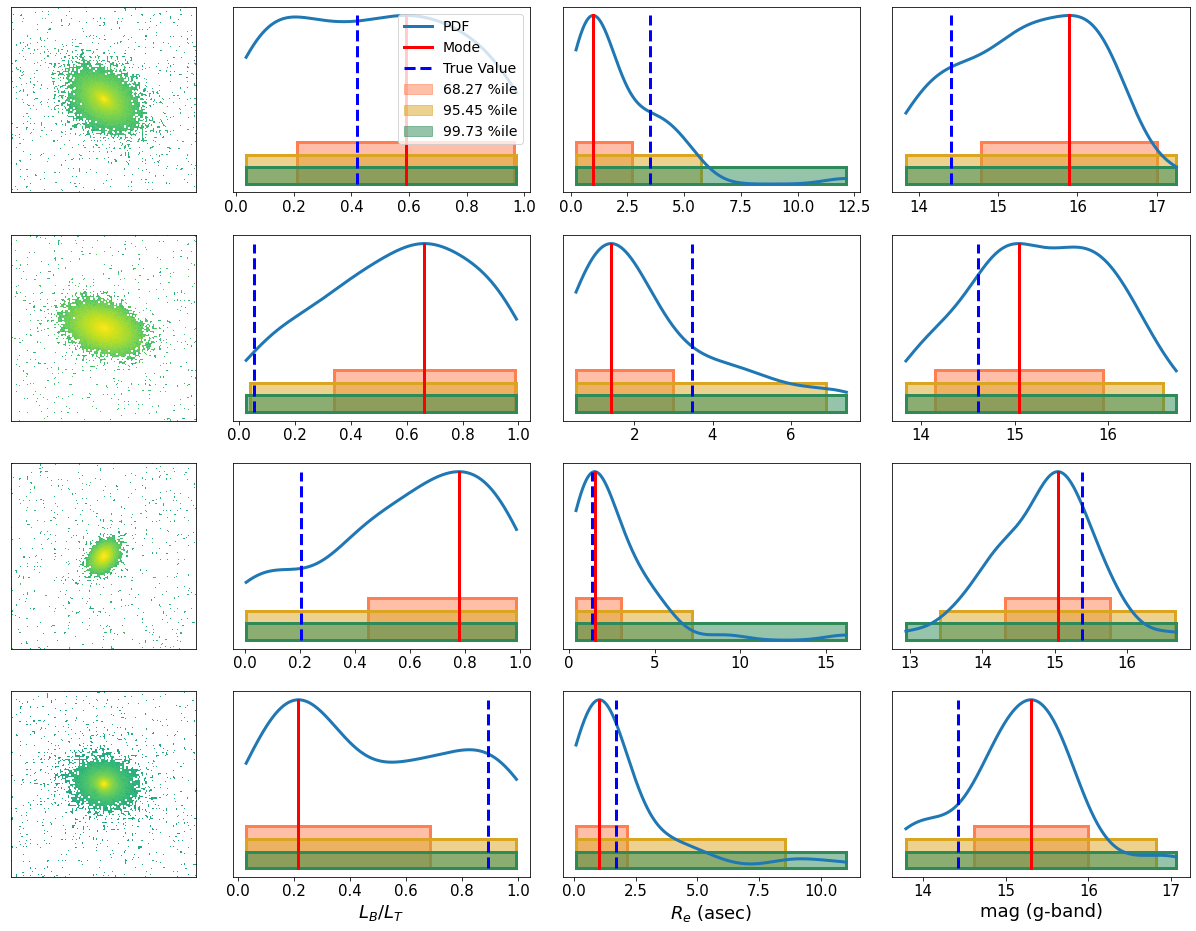

In [ ]:
plot_hists(imgdir="/content/hsc/cutouts/",
           summary_file_path="/content/bayesian_inference_runs/summary.csv",
           pdf_dir="/content/pdfs/",
           font_size=18,
           imgs_to_print=4)

**As can be seen, our trained model does NOT seem to be doing pretty well!!**

This is primarily because we only used about 50 images for trianing and during inference we used only 50 runs. For realistic results, you would need to use thousands of images for training and run inference with about 500/1000 runs,.

The primary goal of this demo is to get you acquainted with how to train a GaMPEN model. In order to see a fully trained GaMPEN model at work, please take a look at the [Making Predictions Tutorial](https://gampen.readthedocs.io/en/latest/Tutorials.html#making-predictions)

**NOTE:** Make sure to save the trained GaMPEN model to your computer or to your google drive as the data in the runtime gets lost once it is disconnected or restarted.  

In the transfer learning tutorial, you can use this trained model and perform transfer learning on it.